# Paczki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zbiór

In [2]:
df = pd.read_parquet('data/states_prepared.parquet')
df

,filename,mapName,ctBuyType,tBuyType,winningSide,matchID,roundNum,seconds,ctAlivePlayers,ctEqVal,...,de_ancient,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_vertigo,bombsite_A,bombsite_B,bombsite_not_planted
0,BLAST-Premier-Spring-Final-2022-ence-vs-big-bo...,de_mirage,Full Eco,Full Eco,CT,1,1,0.148438,5,3700,...,0,0,0,1,0,0,0,0,0,1
1,BLAST-Premier-Spring-Final-2022-ence-vs-big-bo...,de_mirage,Full Eco,Full Eco,CT,1,1,0.398438,5,3700,...,0,0,0,1,0,0,0,0,0,1
2,BLAST-Premier-Spring-Final-2022-ence-vs-big-bo...,de_mirage,Full Eco,Full Eco,CT,1,1,0.648438,5,3700,...,0,0,0,1,0,0,0,0,0,1
3,BLAST-Premier-Spring-Final-2022-ence-vs-big-bo...,de_mirage,Full Eco,Full Eco,CT,1,1,0.898438,5,3700,...,0,0,0,1,0,0,0,0,0,1
4,BLAST-Premier-Spring-Final-2022-ence-vs-big-bo...,de_mirage,Full Eco,Full Eco,CT,1,1,1.148438,5,3700,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186232,PGL-Major-Antwerp-2022-vitality-vs-outsiders-m...,de_mirage,Full Buy,Semi Buy,CT,333,24,19.765625,1,30150,...,0,0,0,1,0,0,0,1,0,0
3186233,PGL-Major-Antwerp-2022-vitality-vs-outsiders-m...,de_mirage,Full Buy,Semi Buy,CT,333,24,20.015625,1,30150,...,0,0,0,1,0,0,0,1,0,0
3186234,PGL-Major-Antwerp-2022-vitality-vs-outsiders-m...,de_mirage,Full Buy,Semi Buy,CT,333,24,20.265625,1,30150,...,0,0,0,1,0,0,0,1,0,0
3186235,PGL-Major-Antwerp-2022-vitality-vs-outsiders-m...,de_mirage,Full Buy,Semi Buy,CT,333,24,20.515625,1,30150,...,0,0,0,1,0,0,0,1,0,0


In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df.isna().sum())

filename                              0
mapName                               0
ctBuyType                             0
tBuyType                              0
winningSide                           0
matchID                               0
roundNum                              0
seconds                               0
ctAlivePlayers                        0
ctEqVal                               0
tAlivePlayers                         0
tEqVal                                0
bombsite                              0
ct_hp                                 0
t_hp                                  0
ct_armor                              0
t_armor                               0
ct_hasHelmet                          0
t_hasHelmet                           0
ct_DecoyGrenade                       0
t_DecoyGrenade                        0
ct_Flashbang                          0
t_Flashbang                           0
ct_HEGrenade                          0
t_HEGrenade                           0


In [4]:
ds = df.loc[df.ctMinDistToA.isna(), ['matchID', 'roundNum']].groupby(['matchID', 'roundNum'])
ds

In [5]:
ds.groups.keys()

dict_keys([])

In [6]:
ds = df.loc[df.tMinDistToA.isna(), ['matchID', 'roundNum']].groupby(['matchID', 'roundNum'])
ds

In [7]:
ds.groups.keys()

dict_keys([])

In [8]:
filtr = df.filename.str.startswith('BLAST-Premier-Spring-Final-2022')
df['train'] = ~filtr

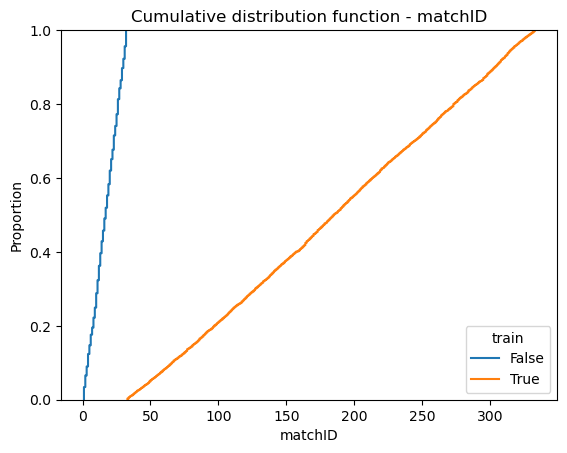

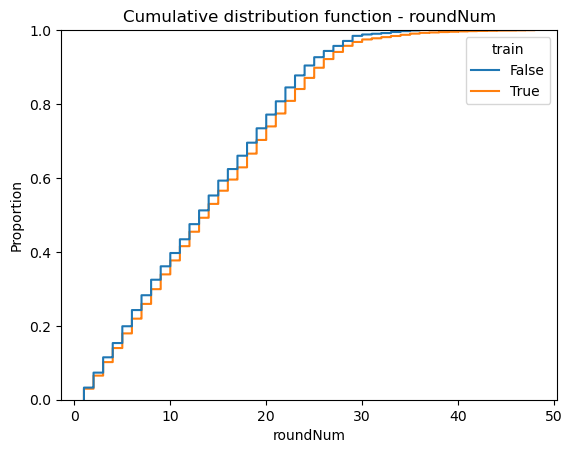

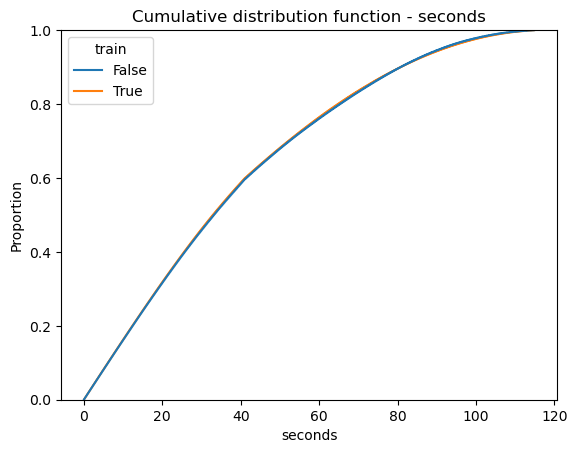

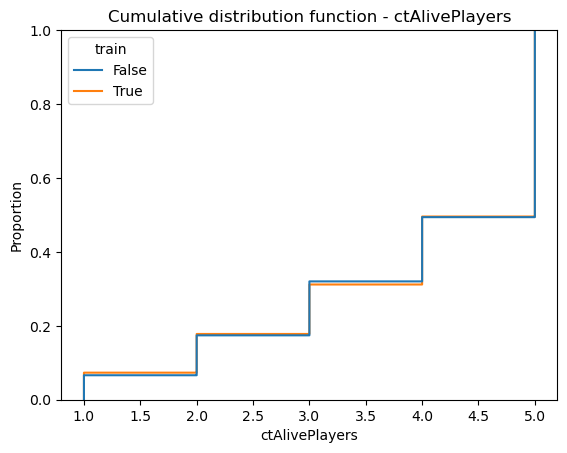

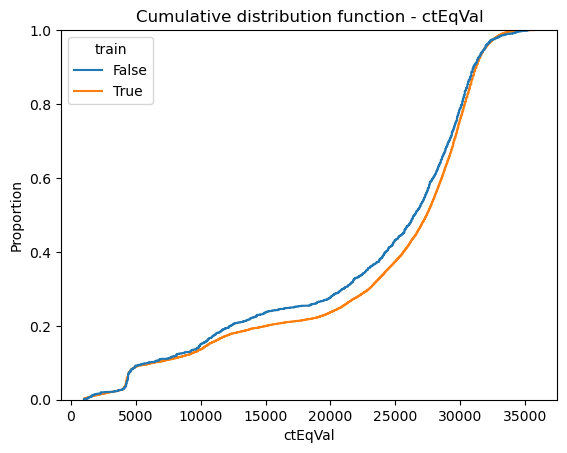

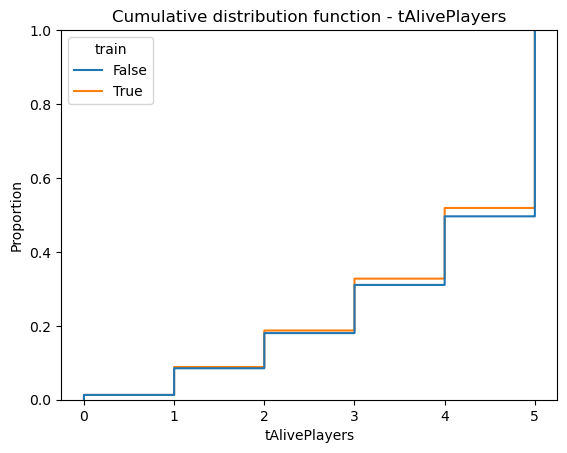

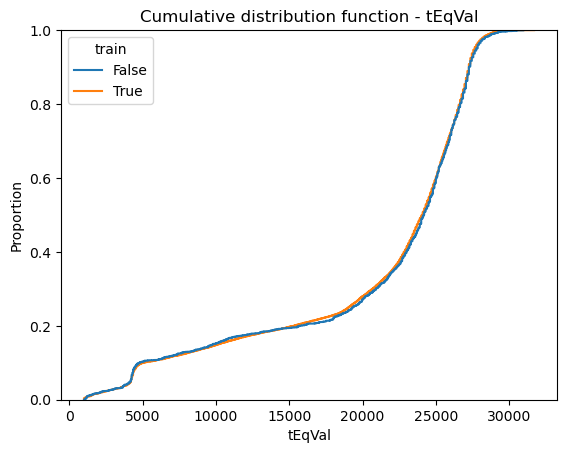

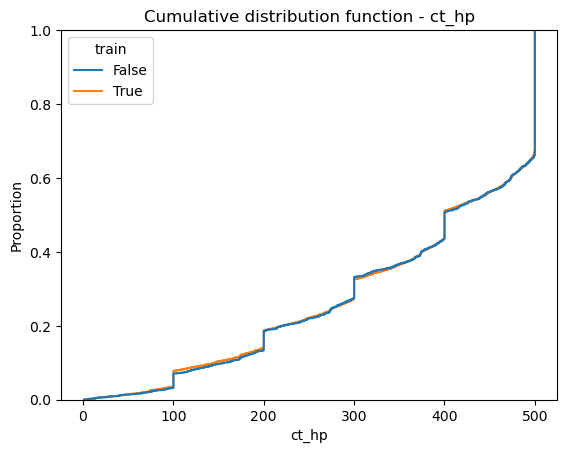

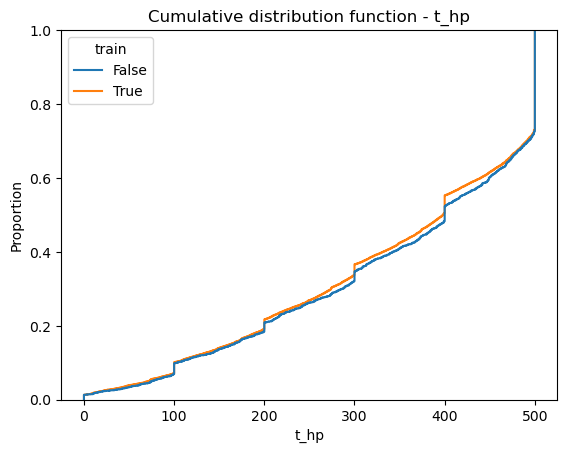

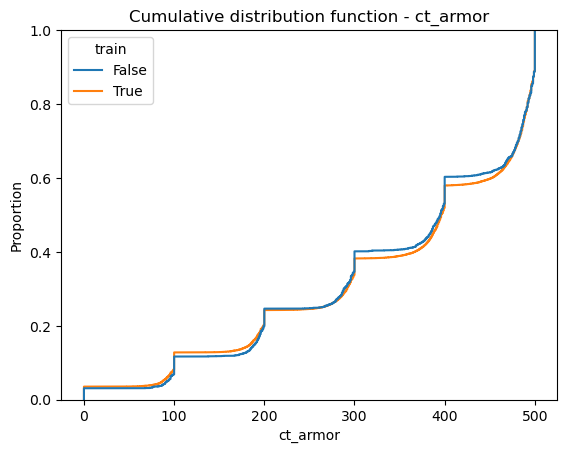

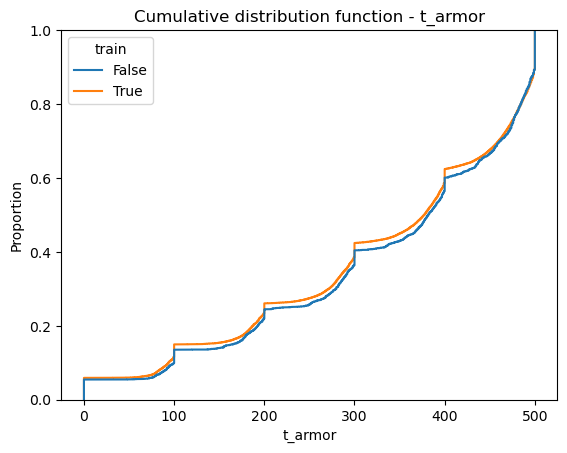

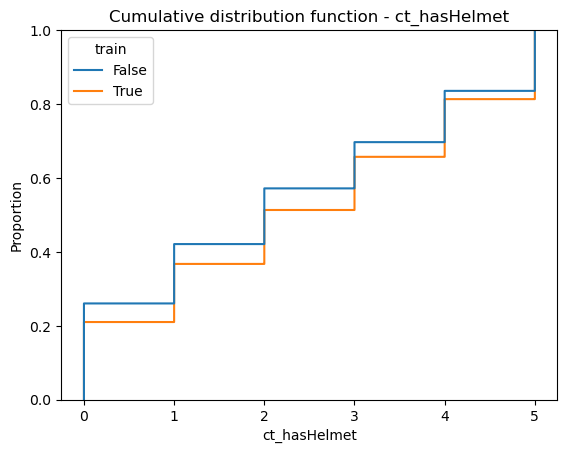

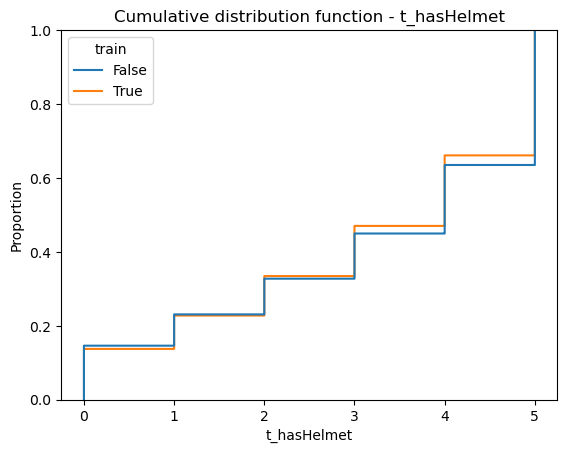

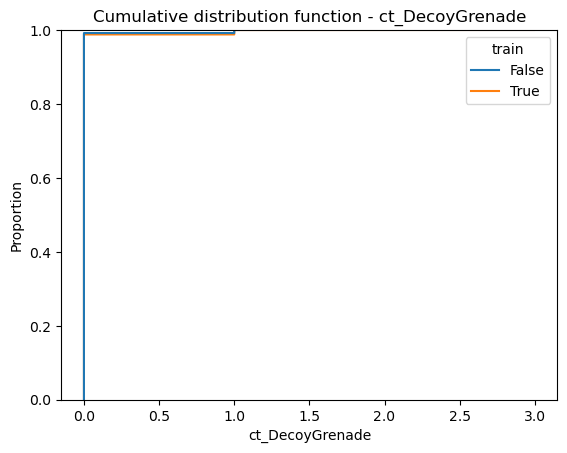

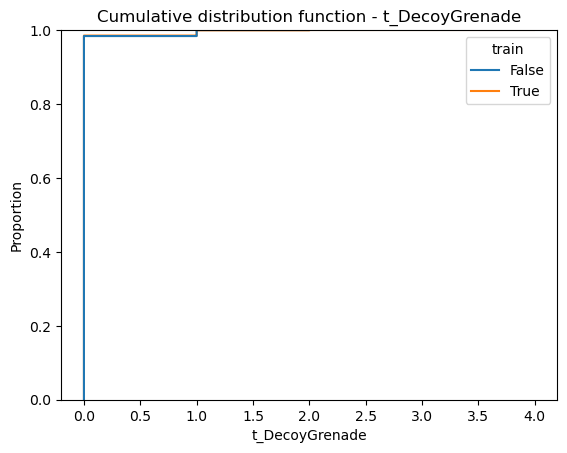

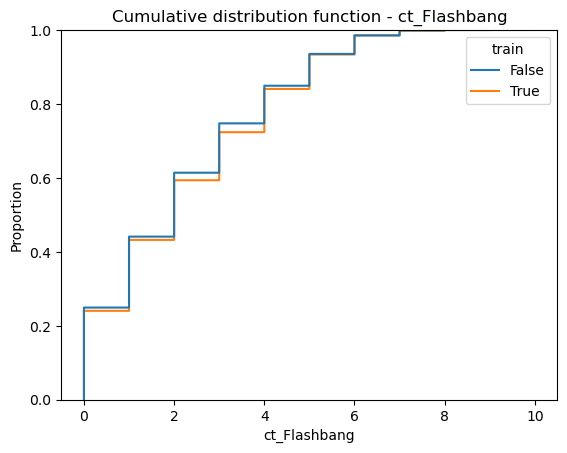

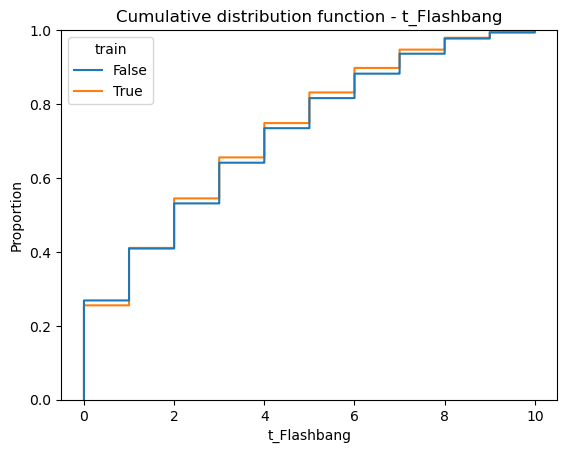

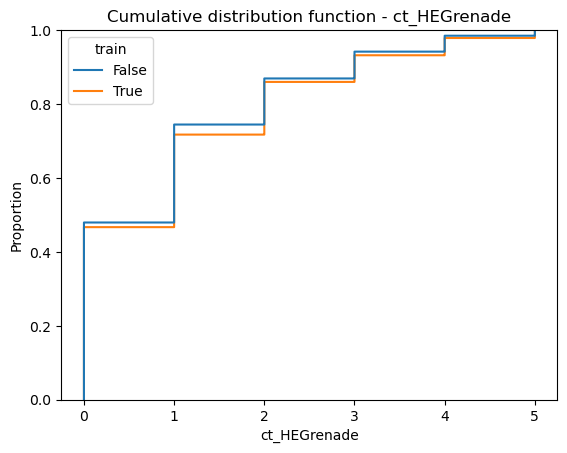

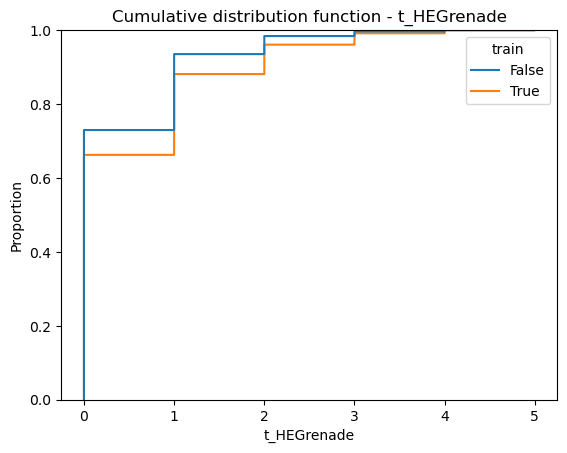

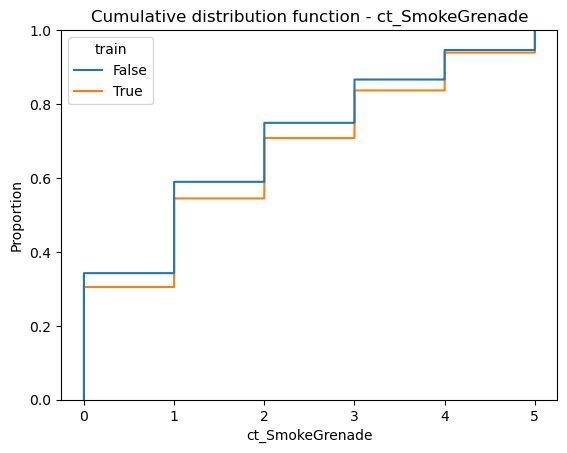

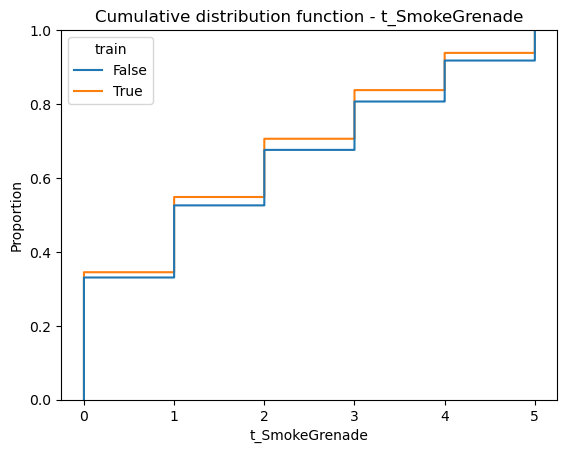

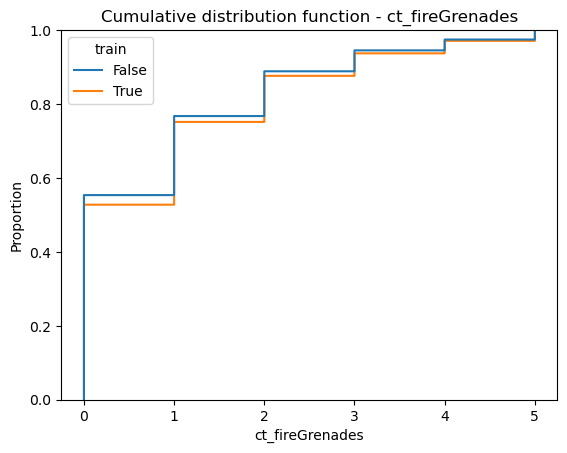

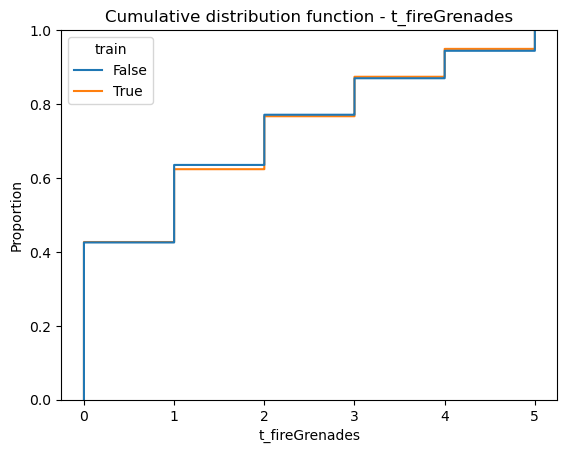

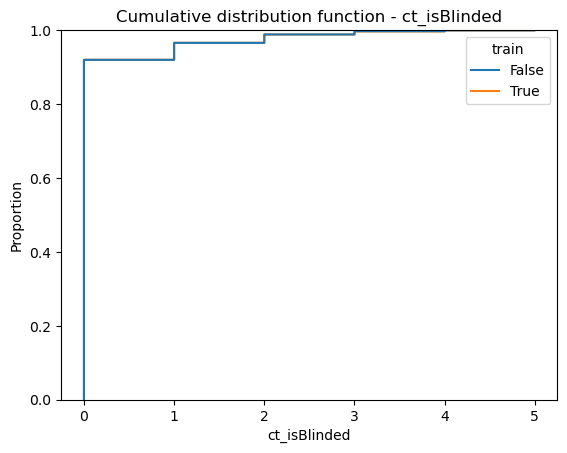

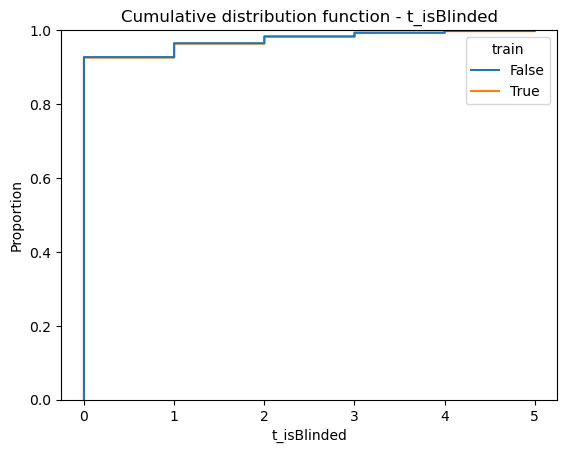

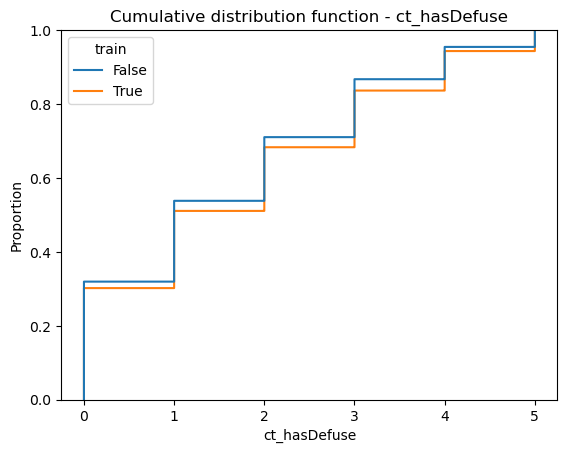

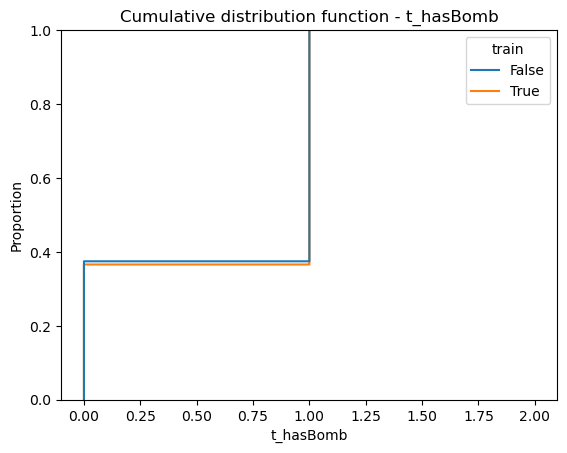

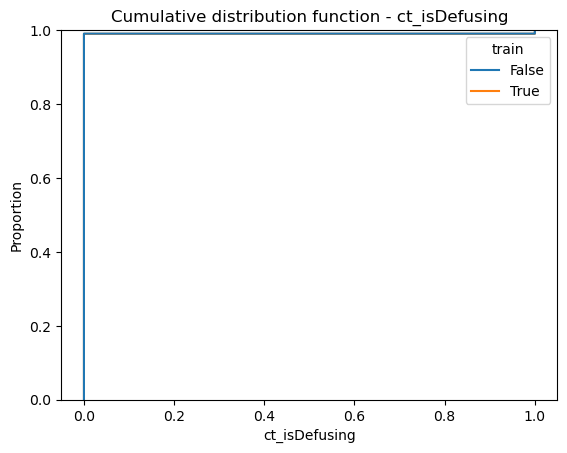

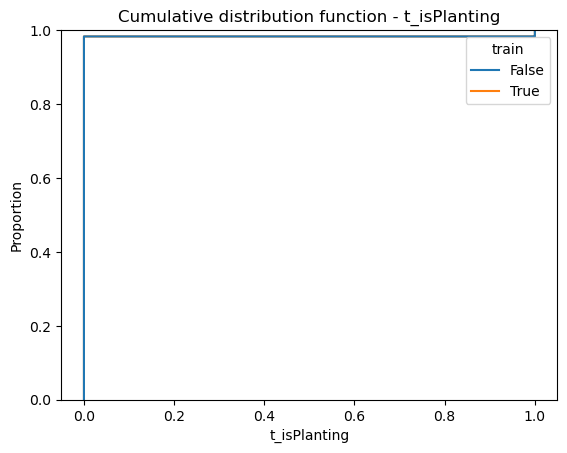

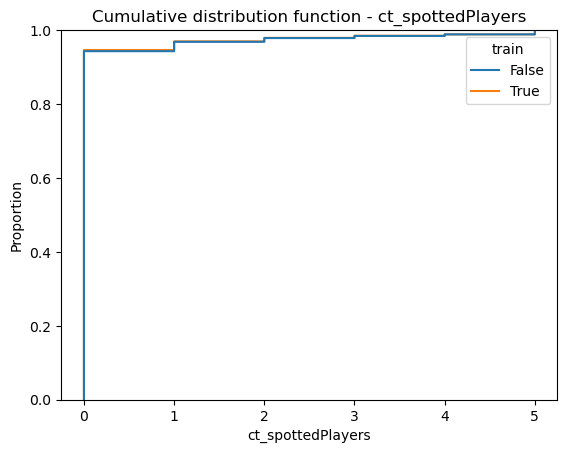

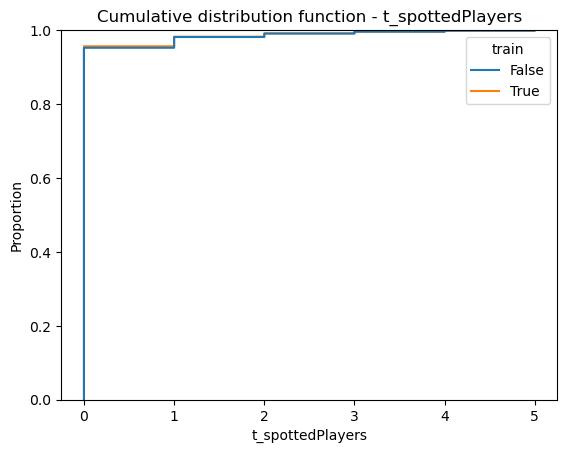

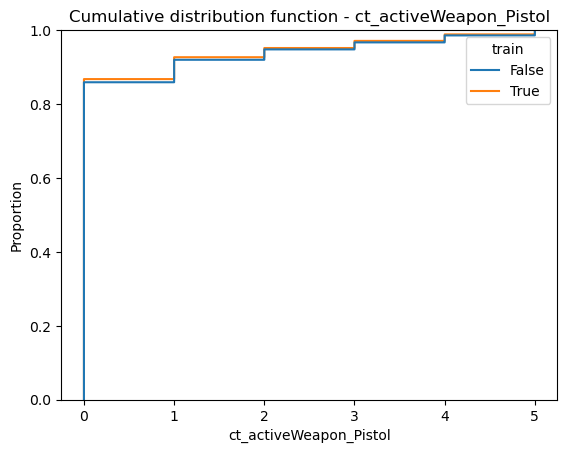

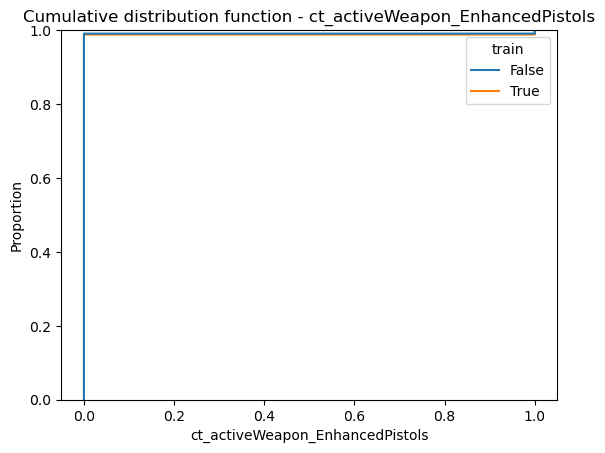

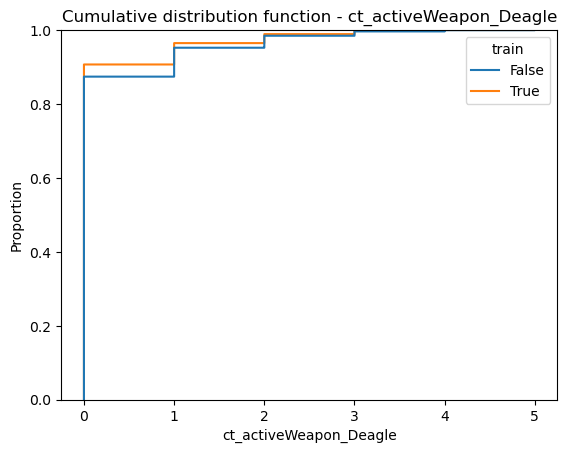

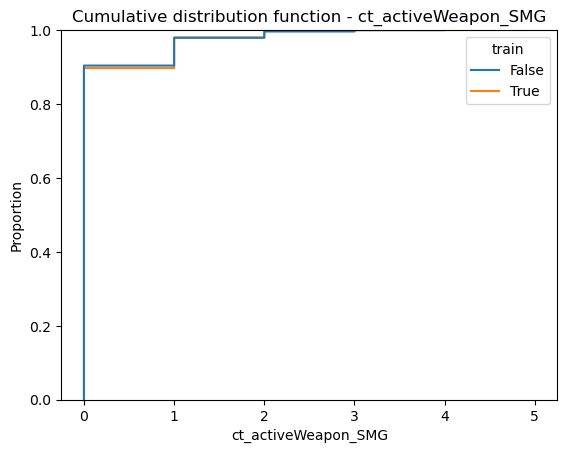

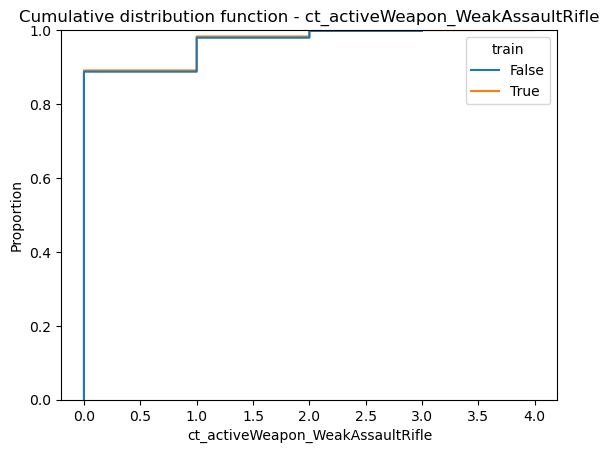

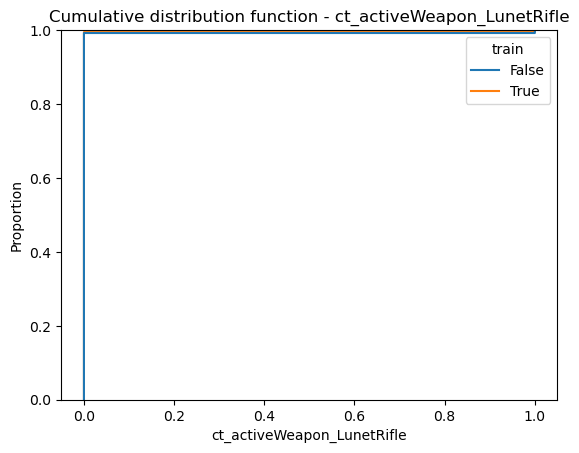

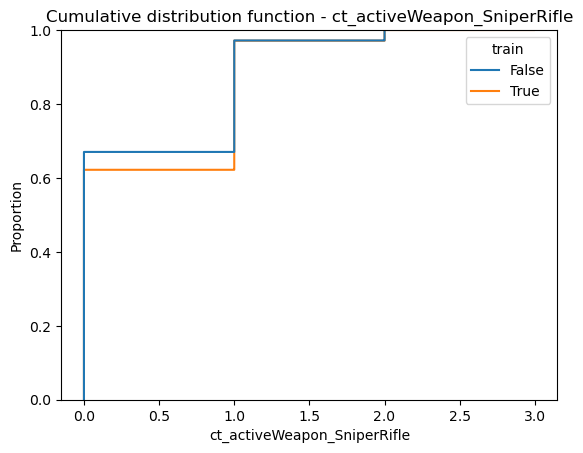

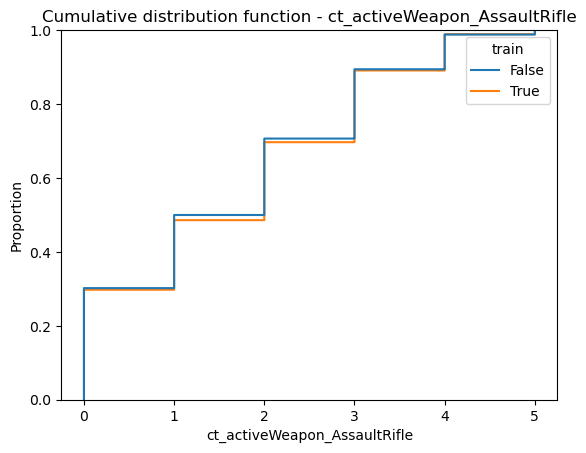

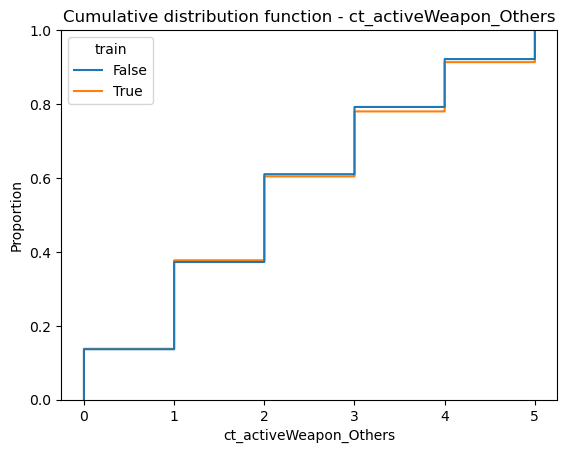

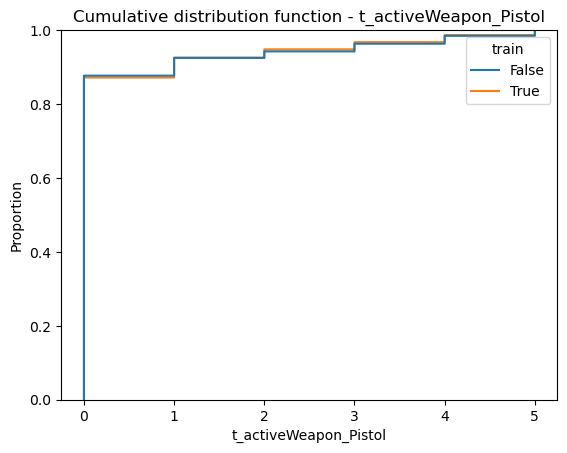

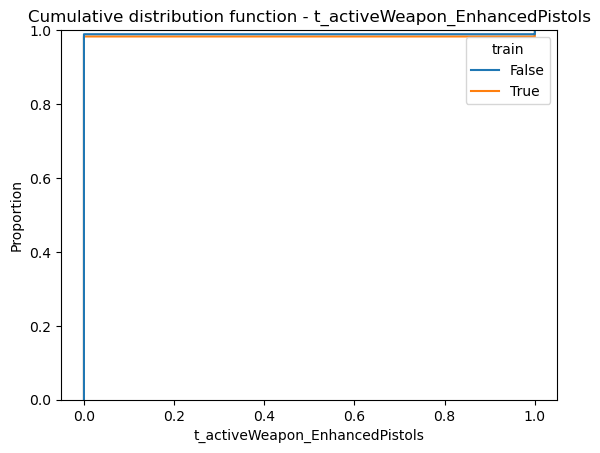

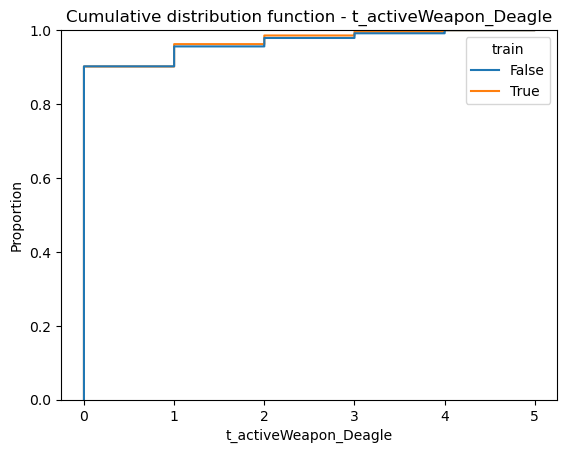

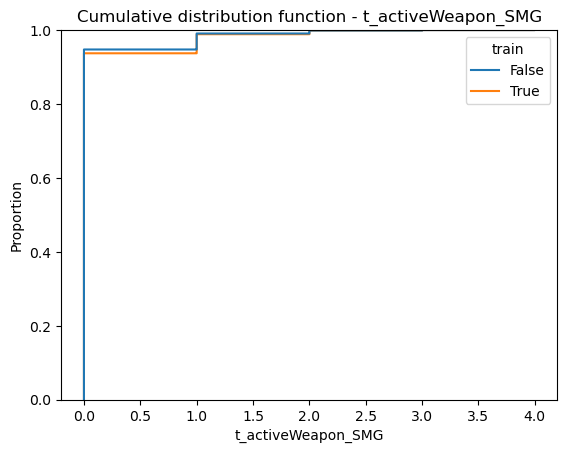

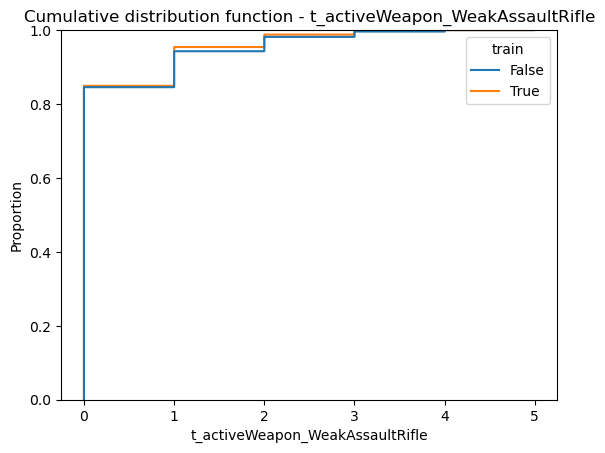

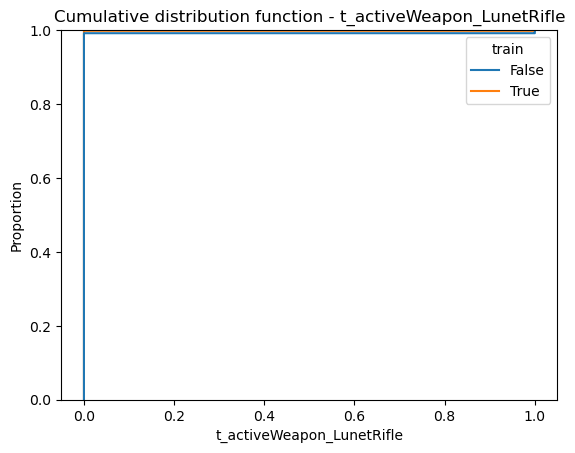

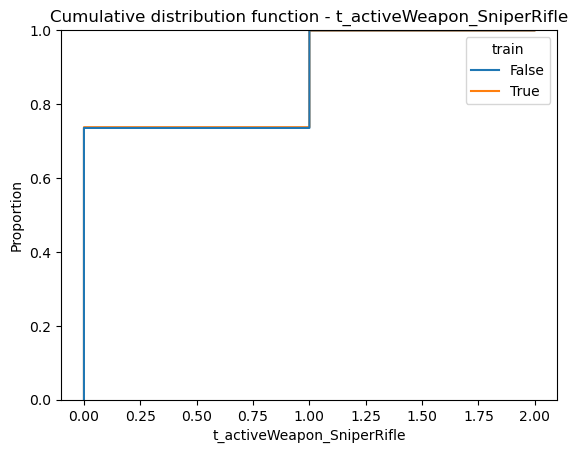

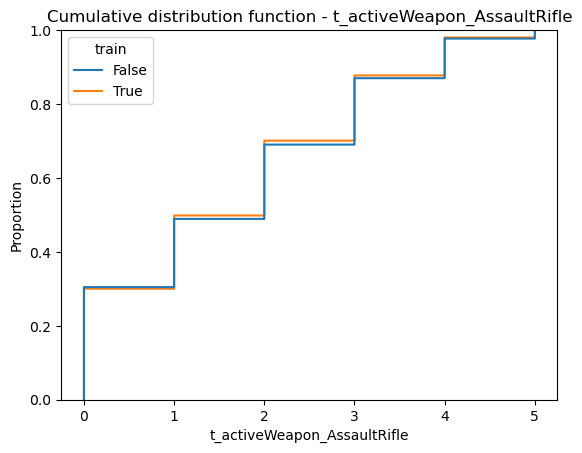

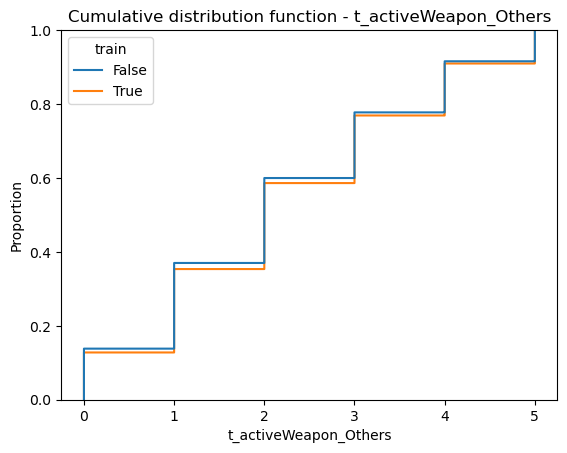

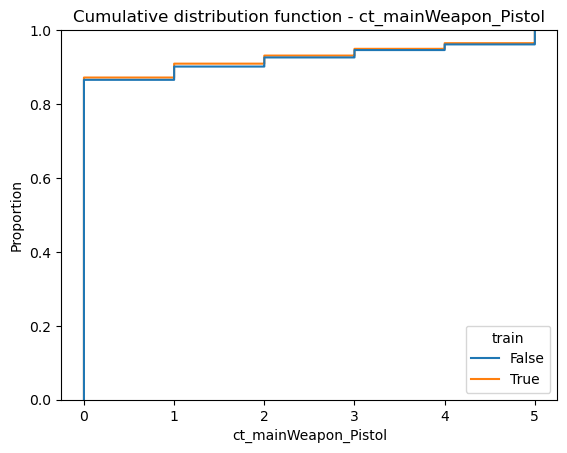

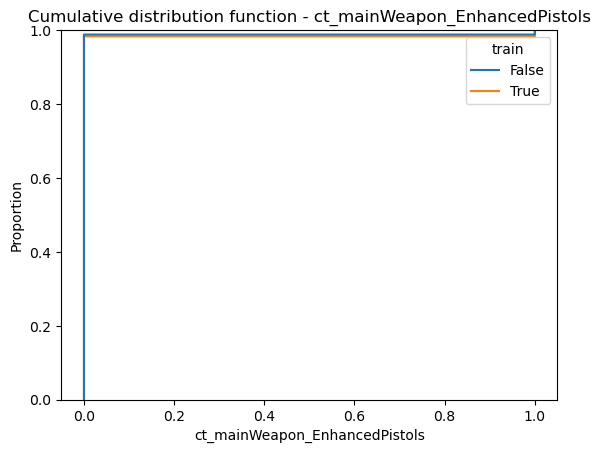

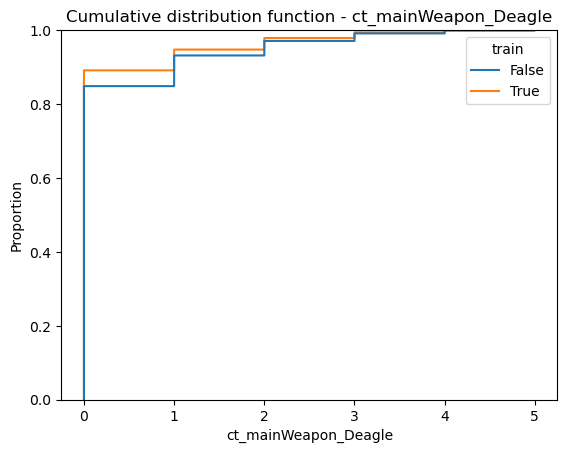

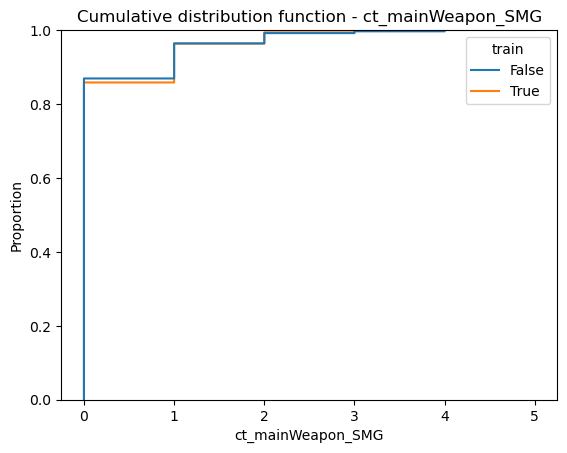

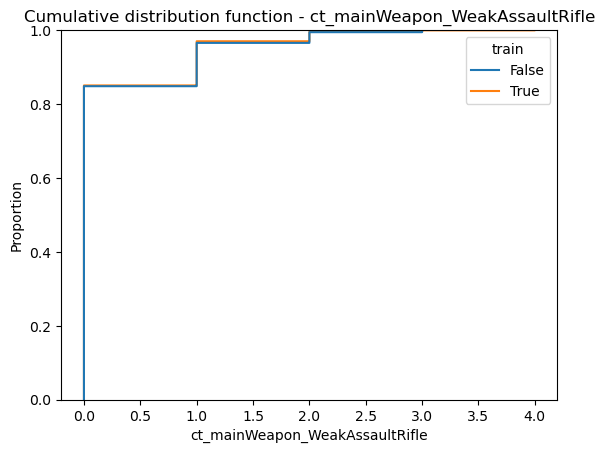

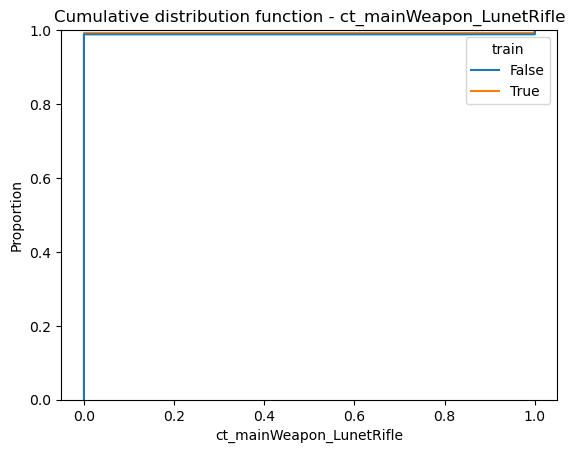

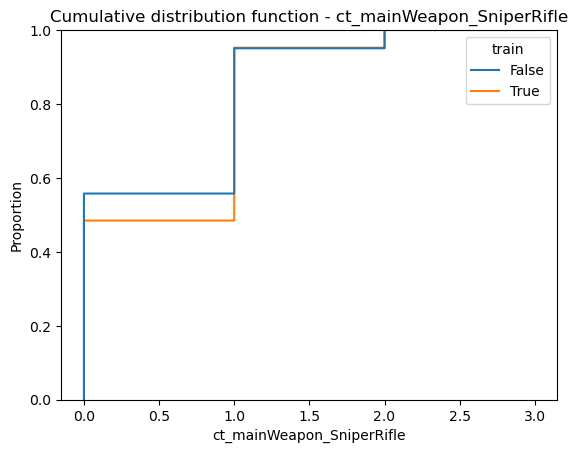

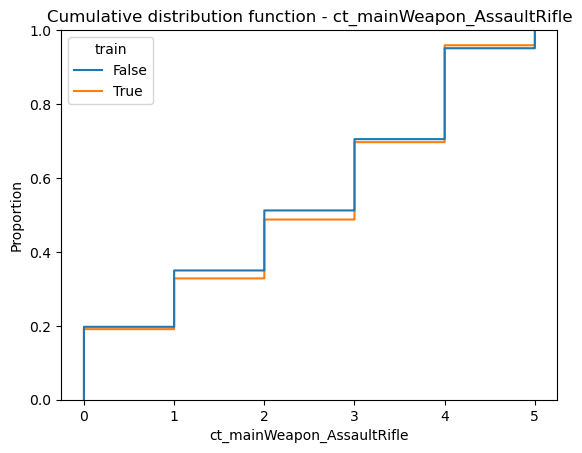

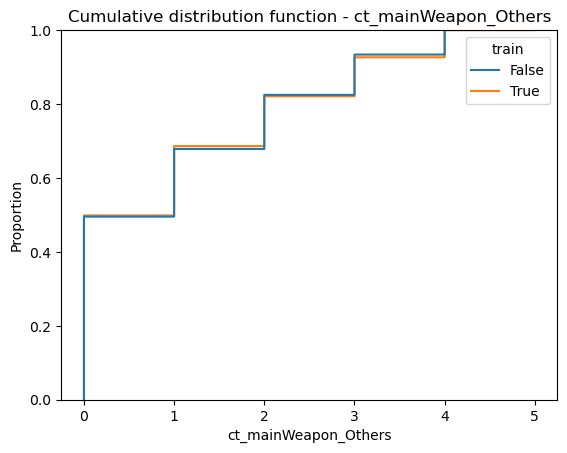

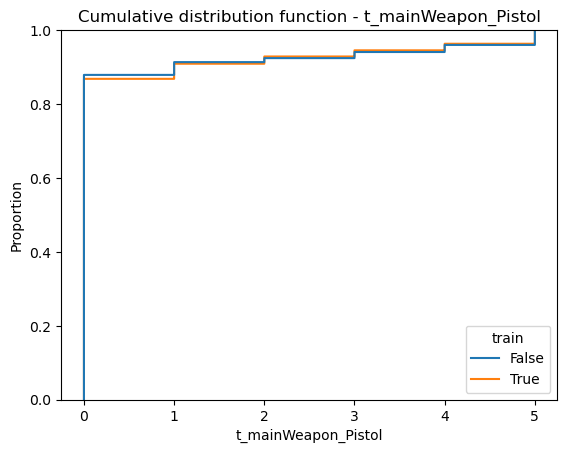

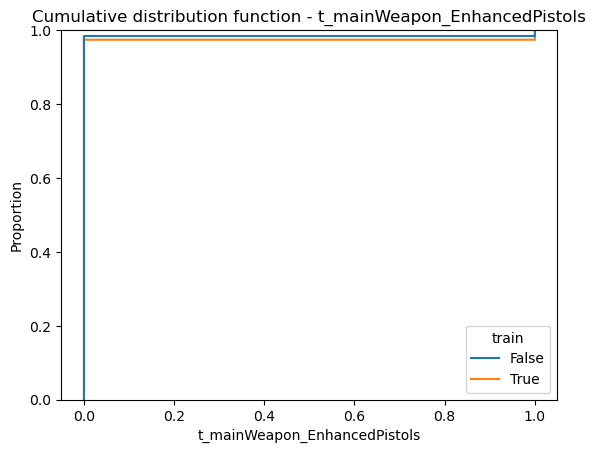

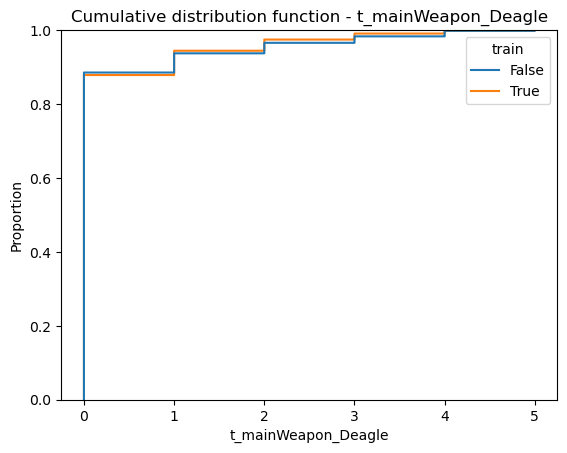

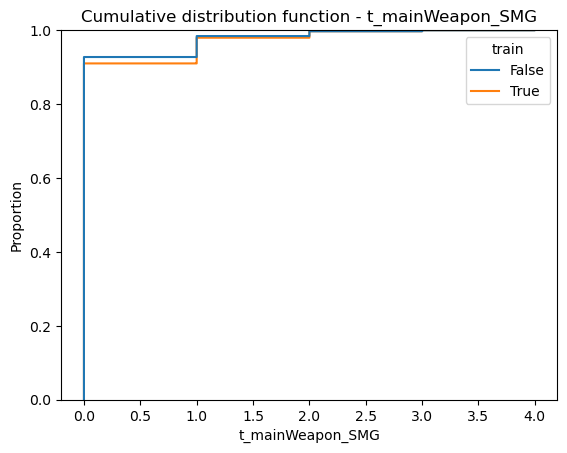

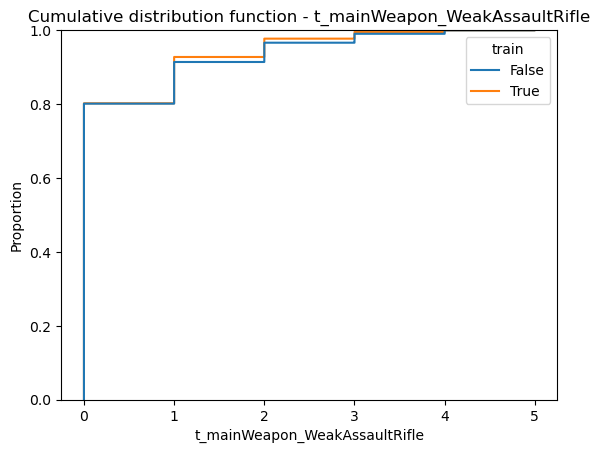

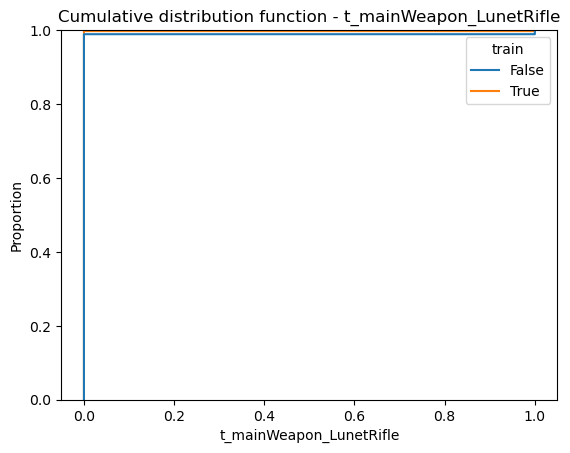

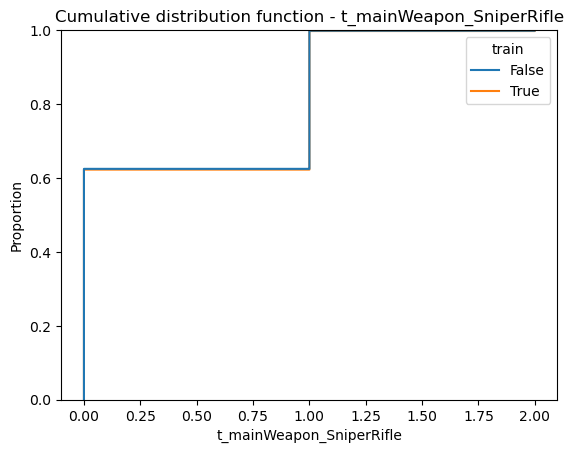

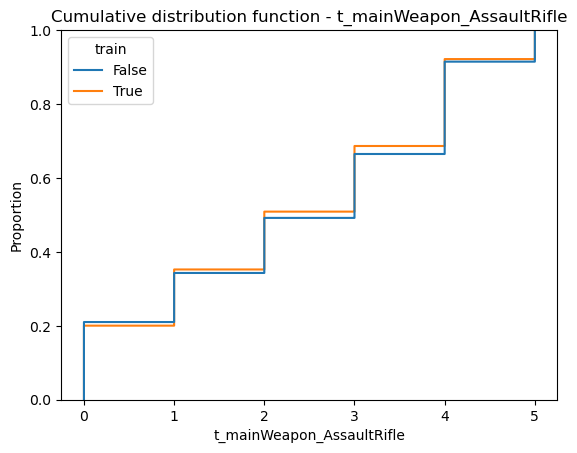

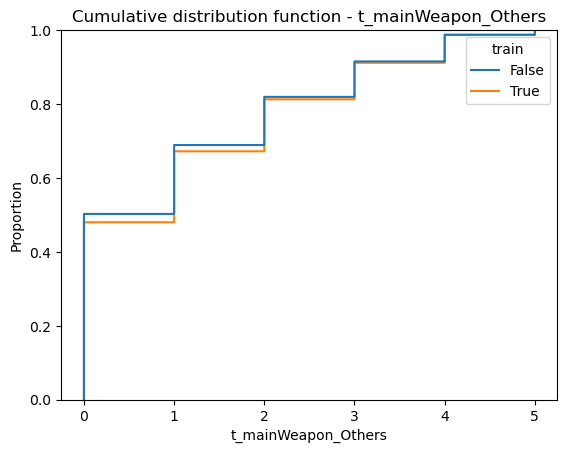

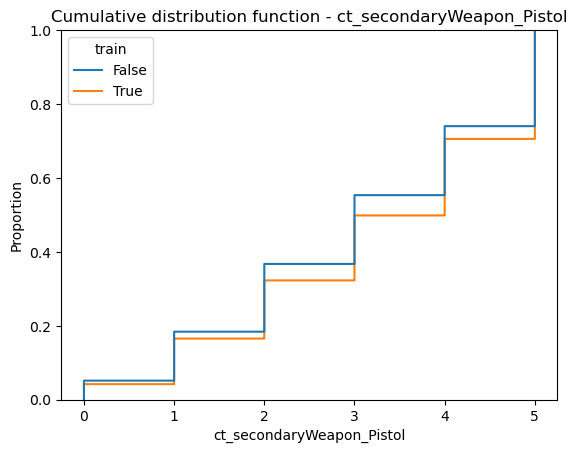

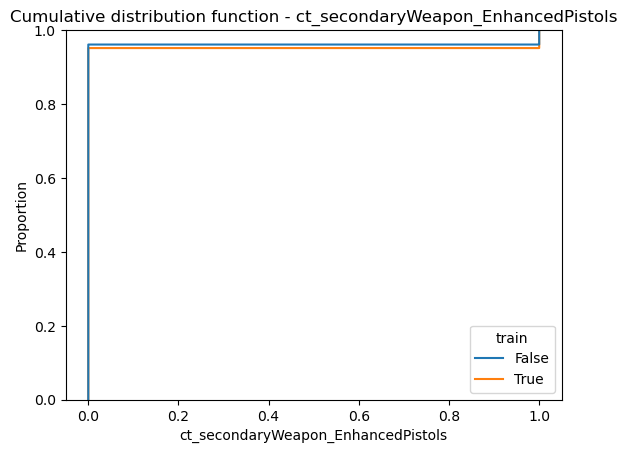

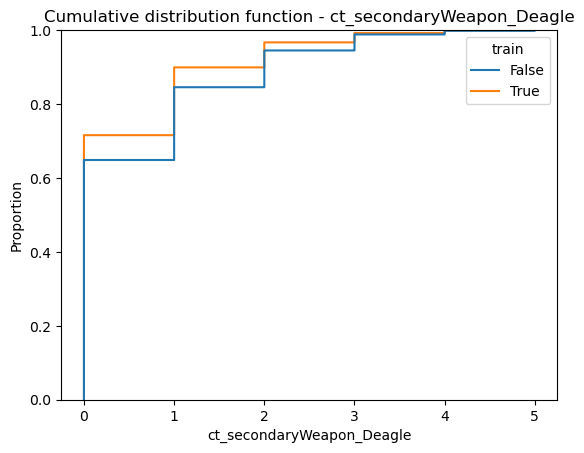

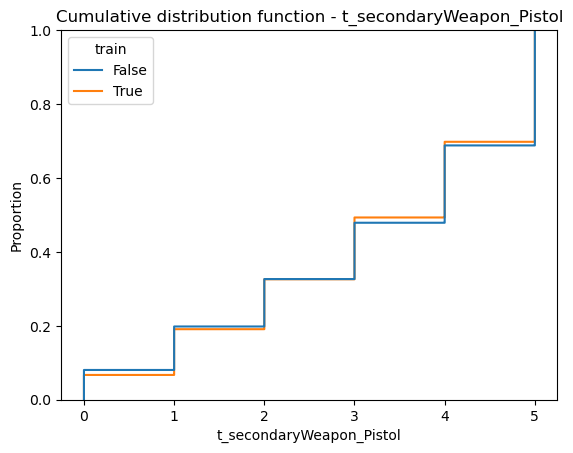

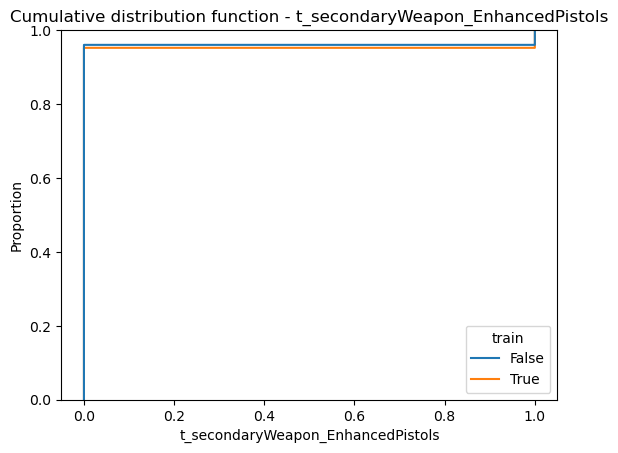

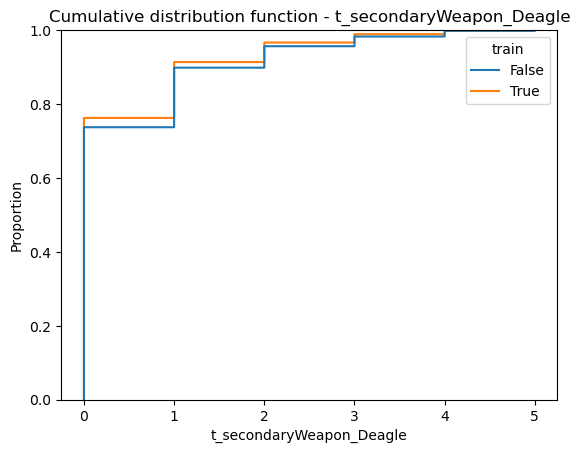

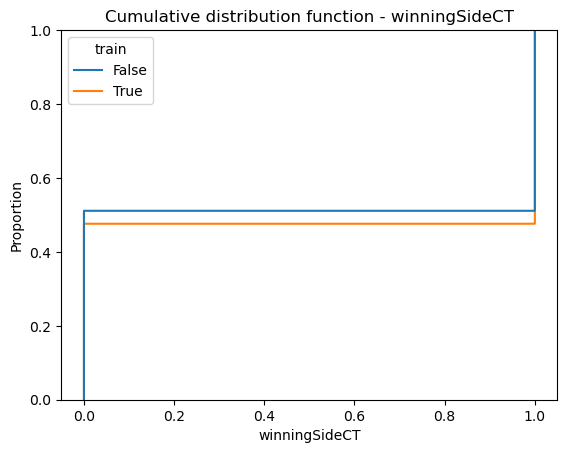

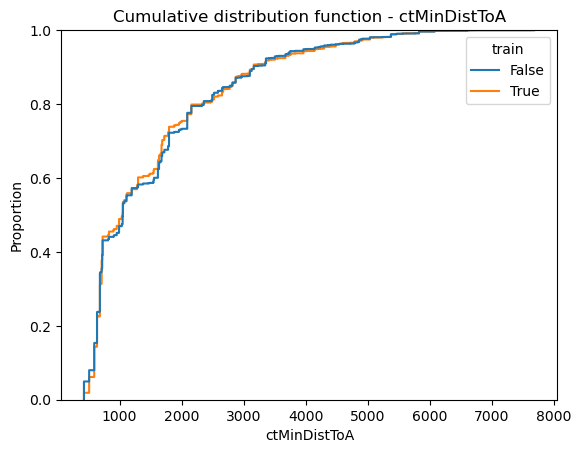

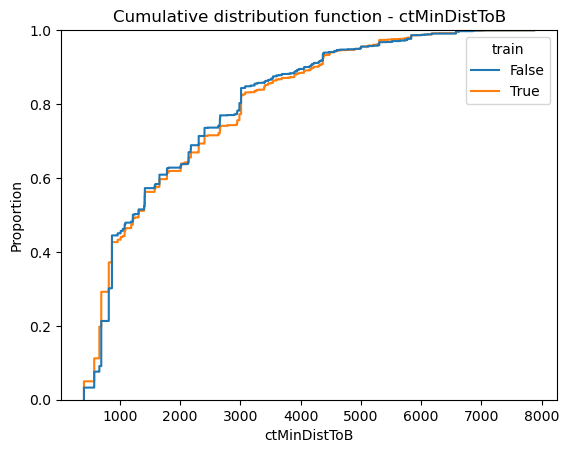

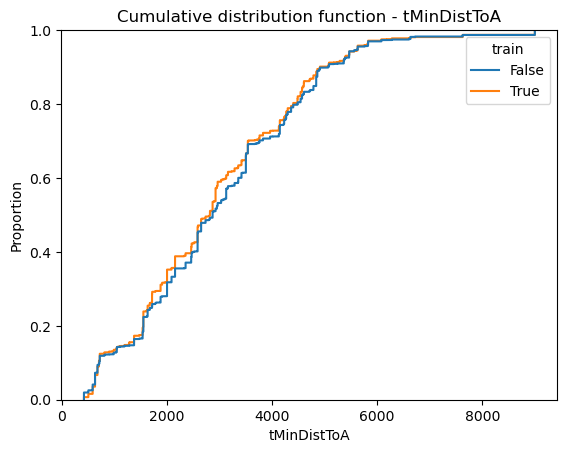

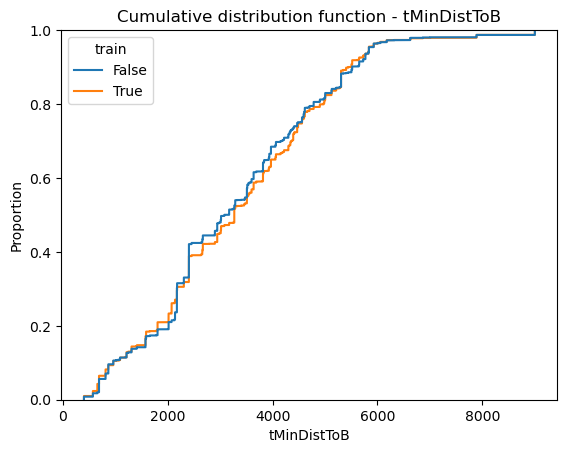

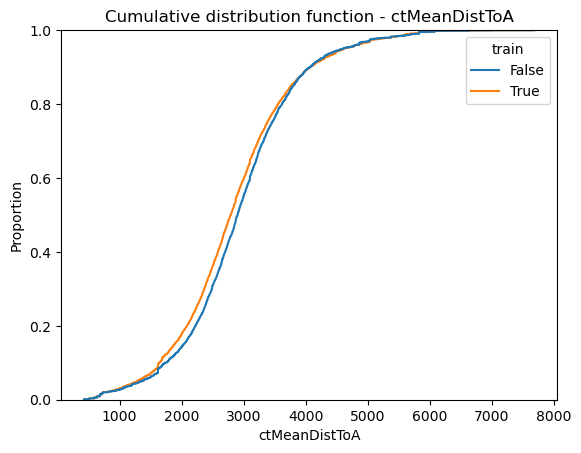

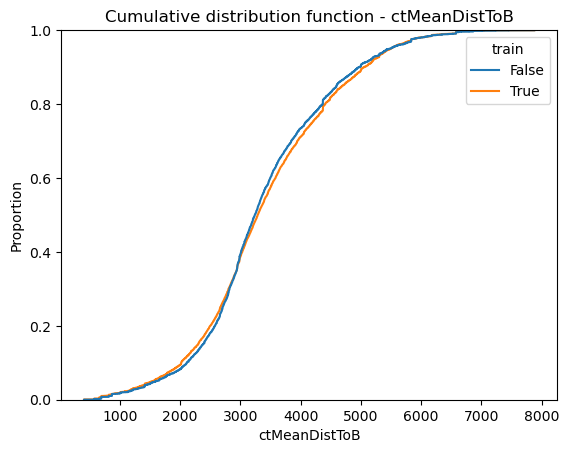

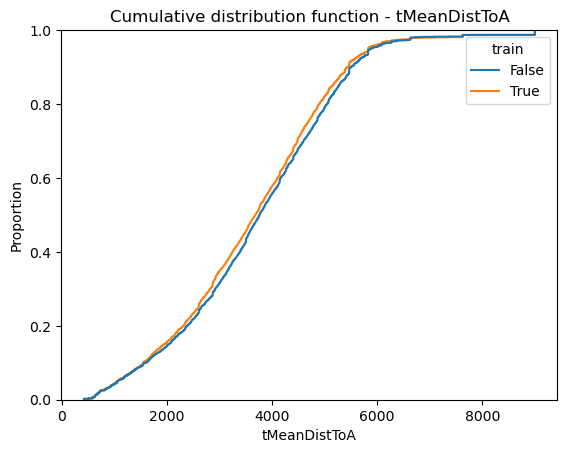

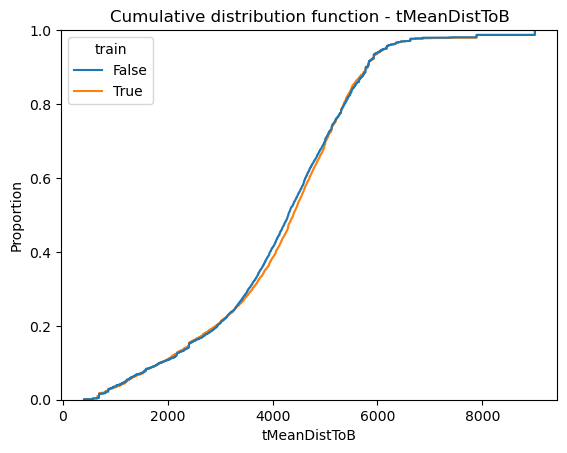

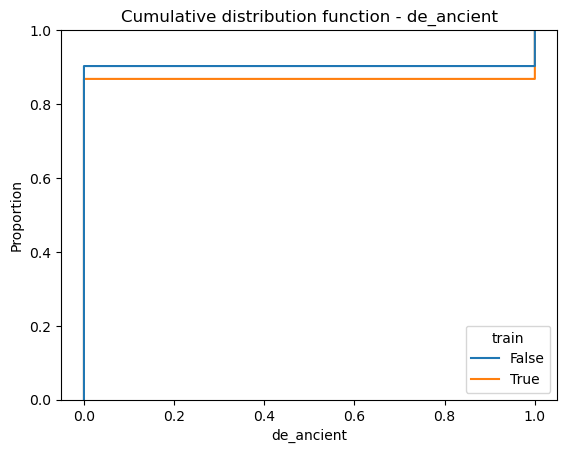

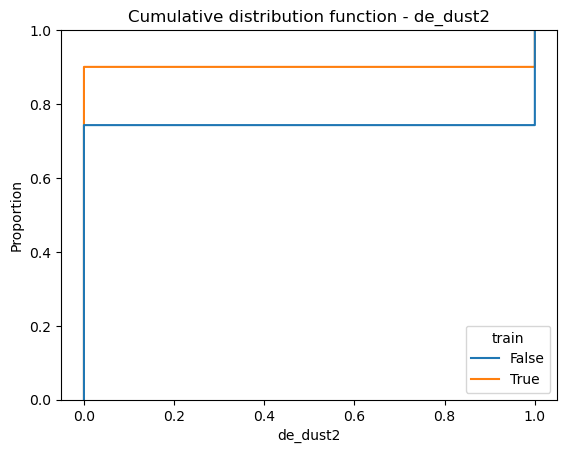

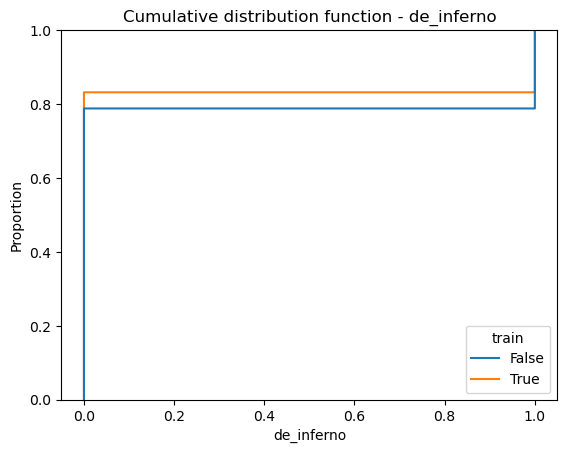

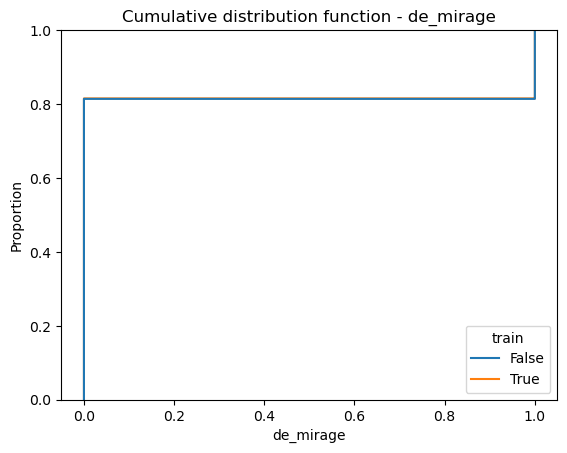

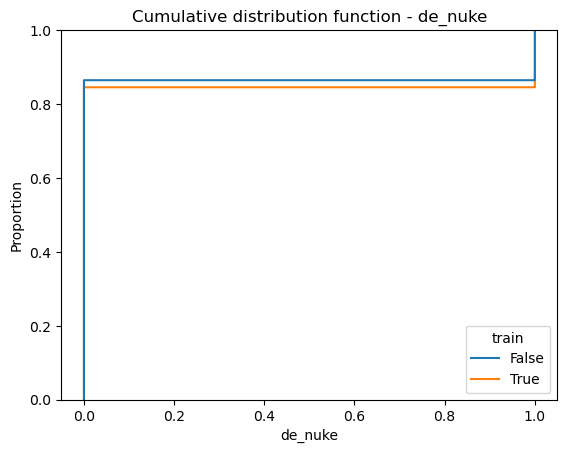

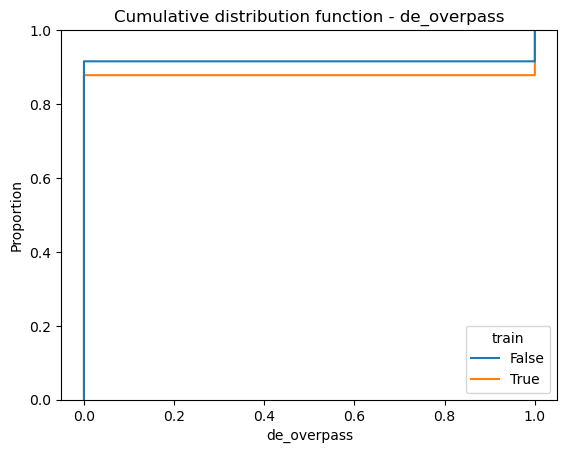

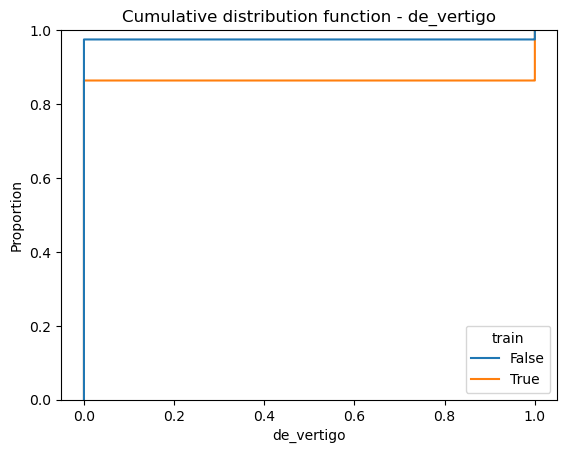

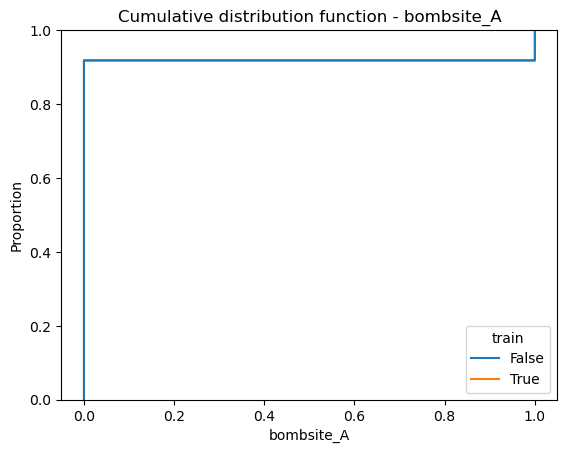

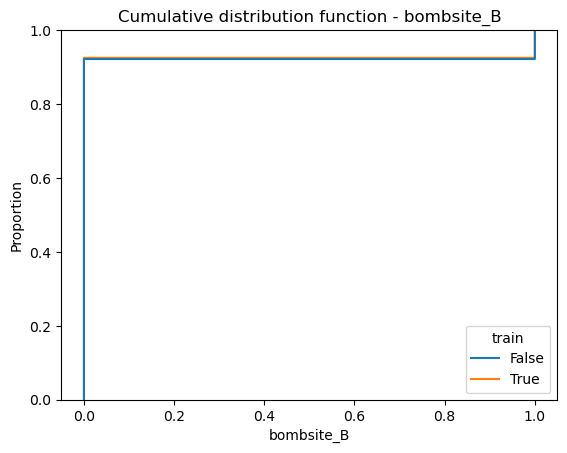

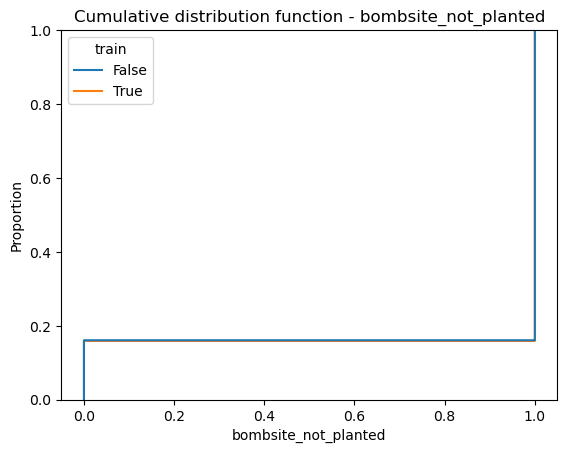

In [9]:
for col in df.select_dtypes('number'):
    sns.ecdfplot(x=col, data=df, hue='train');
    plt.title(f"Cumulative distribution function - {col}")
    plt.show()